In [1]:
from PyQt5.sip import assign
%load_ext autoreload
%autoreload 2

In [12]:
#%cd ..

In [2]:
%cd code

C:\Users\girob\Documents\MAI\IML\clusteringmethods\code


In [3]:
from preprocessing import preprocess_sick, preprocess_grid, preprocess_vowel
from fuzzyclustering import gs_fcm, update_membership_matrix
from utils import plot_clusters
import numpy as np
from main import load_ds

In [6]:
from scipy.io.arff import loadarff
import pandas as pd
df_sick, meta_train = loadarff(f'../datasets/sick.arff')

# Define datasets
df_sick = pd.DataFrame(df_sick)

# Decode utf8 columns
for col in df_sick.columns:
    df_sick[col].map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [9]:
count = (df_sick["age"] > 90).sum()
print(count)

9


In [40]:
np.random.seed(42)  # For reproducibility
data = np.random.rand(10, 2)
centers = np.array([[0.2, 0.5], [0.8, 0.7], [0.4, 0.9]])
# Fuzziness parameter
m = 1.01
membership_matrix = update_membership_matrix(data, centers, m)

# Output Results
print("Data Points:")
print(data)
print("\nCluster Centers:")
print(centers)
print("\nMembership Matrix:")
print(membership_matrix)
print("\nSum of memberships for each data point (should be 1):")
print(np.sum(membership_matrix, axis=0))

Data Points:
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]

Cluster Centers:
[[0.2 0.5]
 [0.8 0.7]
 [0.4 0.9]]

Membership Matrix:
[[8.68676270e-187 4.50807382e-130 1.00000000e+000 2.46249906e-012
  6.15157786e-072 9.12111187e-024 2.78433283e-031 1.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [1.17774724e-188 1.00000000e+000 7.10239443e-078 1.02339902e-069
  1.00000000e+000 1.00092083e-066 1.00000000e+000 1.04379153e-081
  6.67290818e-139 5.85840209e-050]
 [1.00000000e+000 9.51624939e-114 1.84561461e-071 1.00000000e+000
  9.62229079e-030 1.00000000e+000 7.38932086e-045 2.18313239e-075
  2.44957690e-112 6.89385195e-059]]

Sum of memberships for each data point (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
from main import load_ds

df_X, y = load_ds("grid")

GS_FCM converged in 85 iterations.
Cluster 0 - Points shape: (247, 2)
Cluster 1 - Points shape: (208, 2)
Cluster 2 - Points shape: (248, 2)
Cluster 3 - Points shape: (246, 2)
Cluster 4 - Points shape: (244, 2)
Cluster 5 - Points shape: (241, 2)
Cluster 6 - Points shape: (208, 2)
Cluster 7 - Points shape: (246, 2)


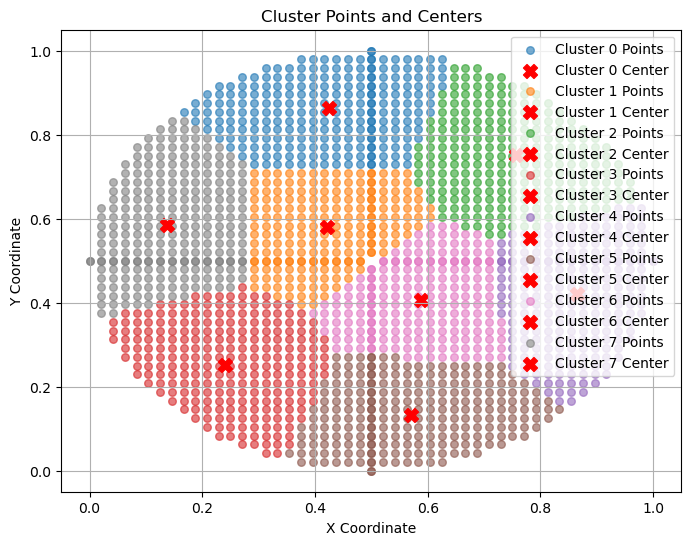

In [66]:
from fuzzyclustering import gs_fcm, get_cluster_list
from utils import plot_clusters
# Number of clusters
C = 8
m = 2
suppress = True
alpha = 0.5
eta = 0.3

clusters, iters, centers = gs_fcm(df_X,C,m,suppress=suppress,generalized=True,eta=eta)
print(f"GS_FCM converged in {iters} iterations.")
assignments = get_cluster_list(df_X,centers,clusters,C)
plot_clusters(assignments)

In [3]:
from main import runAllFuzzyClustering

runAllFuzzyClustering()

In [53]:
from fuzzyclustering import run_all_gs_fcm

for dataset in []:
    results = run_all_gs_fcm(df_X, y)
    results.to_csv("../output/fuzzyclustering.csv")

Convergence after 40 iterations.
Convergence after 24 iterations.
Convergence after 1 iterations.
Convergence after 80 iterations.
Convergence after 3 iterations.
Convergence after 23 iterations.
Convergence after 82 iterations.
Convergence after 15 iterations.
Convergence after 11 iterations.
Convergence after 103 iterations.
Convergence after 62 iterations.
Convergence after 14 iterations.
Convergence after 257 iterations.
Convergence after 44 iterations.
Convergence after 7 iterations.
Convergence after 12 iterations.
Convergence after 59 iterations.
Convergence after 15 iterations.
Convergence after 23 iterations.
Convergence after 22 iterations.
Convergence after 19 iterations.
